SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -812.358 km / s:     858.281 km / s
SpectralCube with shape=(934, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    934  type_s: VRAD      unit_s: km / s  range:     -812.358 km / s:      -0.109 km / s
km / s


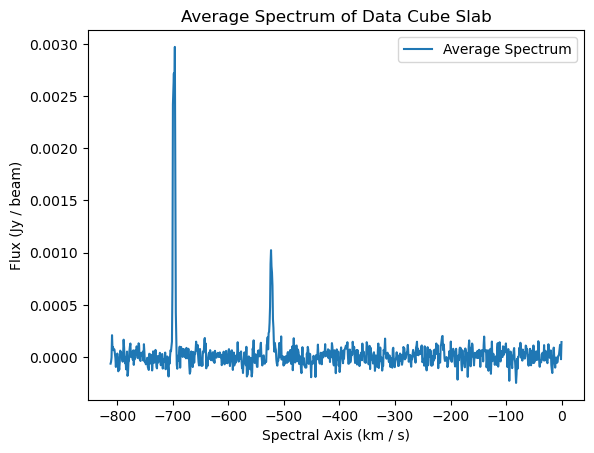

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW0.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)


SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -812.358 km / s:     858.281 km / s
SpectralCube with shape=(987, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    987  type_s: VRAD      unit_s: km / s  range:       -0.109 km / s:     858.281 km / s
km / s


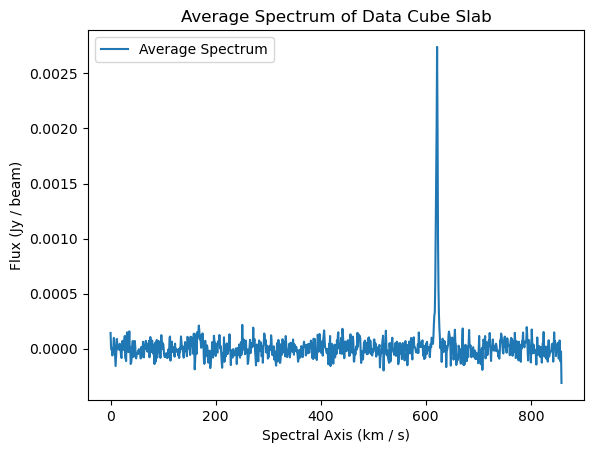

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW0.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(0 * u.km / u.s,  858.281 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_PositiveSpec")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
Hz


SPW1

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -817.107 km / s:     862.945 km / s
SpectralCube with shape=(934, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    934  type_s: VRAD      unit_s: km / s  range:     -817.107 km / s:      -0.282 km / s
km / s


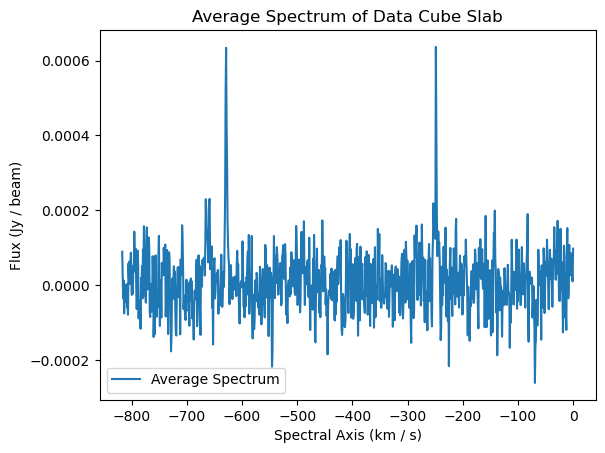

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW1.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.343704900000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(-817 * u.km / u.s, 0 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_NegativeSpec")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -817.107 km / s:     862.945 km / s
SpectralCube with shape=(987, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    987  type_s: VRAD      unit_s: km / s  range:       -0.282 km / s:     862.945 km / s
km / s


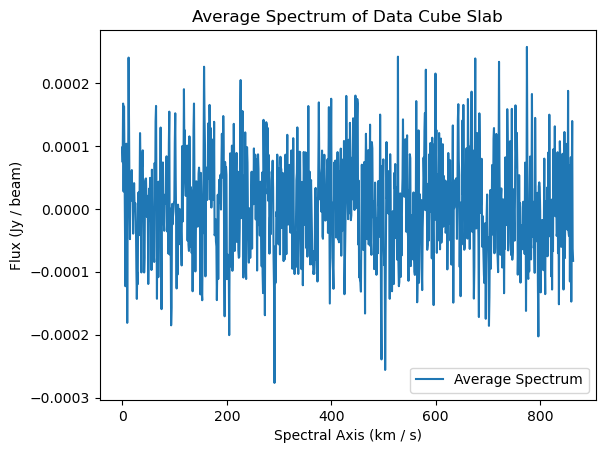

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW1.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.343704900000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(0 * u.km / u.s, 862.9 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_PositiveSpec")

SPW2

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -783.575 km / s:     829.525 km / s
SpectralCube with shape=(933, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    933  type_s: VRAD      unit_s: km / s  range:     -783.575 km / s:      -0.142 km / s
km / s


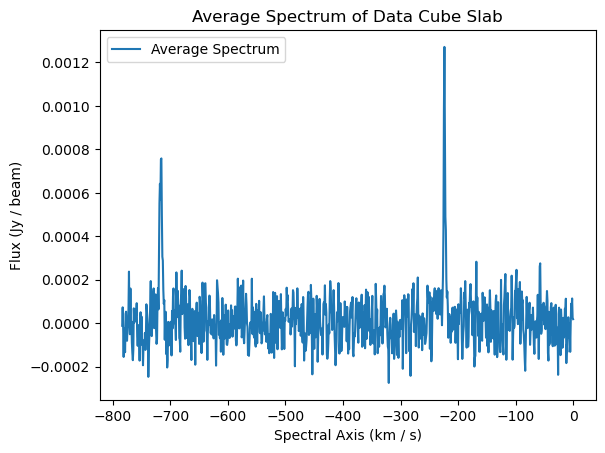

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.482485000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(-783.5 * u.km / u.s, 0 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_NegativeSpec")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -783.575 km / s:     829.525 km / s
SpectralCube with shape=(988, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    988  type_s: VRAD      unit_s: km / s  range:       -0.142 km / s:     829.525 km / s
km / s


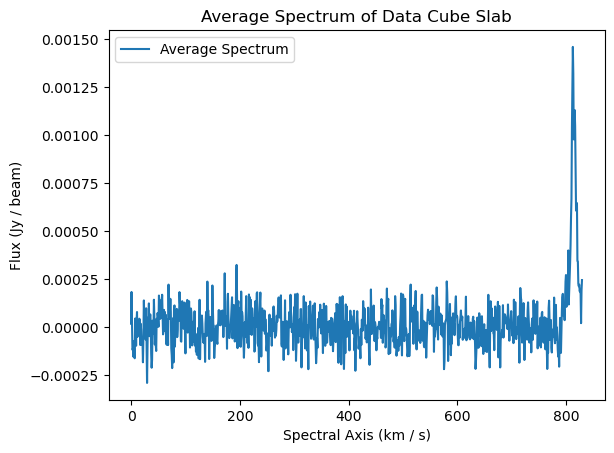

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.482485000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(0 * u.km / u.s, 829.525 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_PositiveSpec")

SPW3

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -790.182 km / s:     832.018 km / s
SpectralCube with shape=(936, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    936  type_s: VRAD      unit_s: km / s  range:     -790.182 km / s:       0.207 km / s
km / s


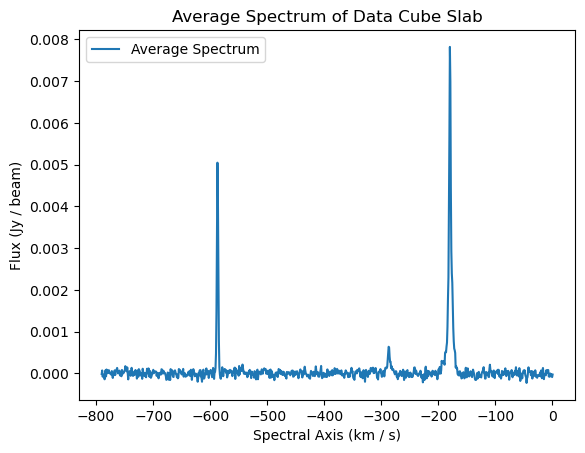

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.462950000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(-790.1 * u.km / u.s, 0 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_NegativeSpec")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -790.182 km / s:     832.018 km / s
SpectralCube with shape=(985, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    985  type_s: VRAD      unit_s: km / s  range:        0.207 km / s:     832.018 km / s
km / s


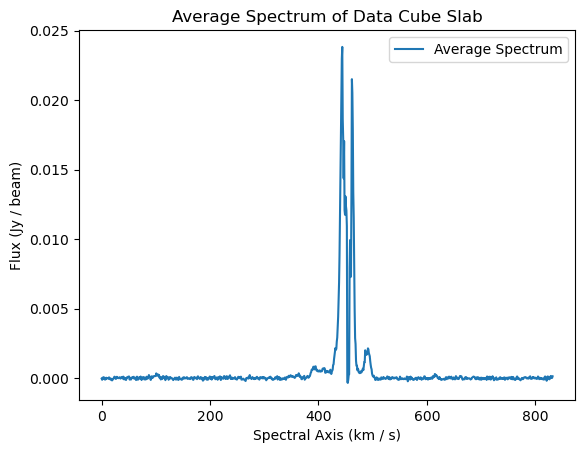

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.462950000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.spectral_slab(0 * u.km / u.s, 832.018 * u.km / u.s) 
# Create a sub_cube cut to these coordinates
sub_cube = sub_cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])#, zlo = freq_range[0], zhi=freq_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
%matplotlib inline
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_PositiveSpec")

FULL FREQUENCY SPECTRA

In [1]:
#SPW 0 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW0.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg


# Create a sub_cube cut to these coordinates
sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube_slab = sub_cube.spectral_slab(335291631929.234 * u.Hz, 337165460443.700 * u.Hz) 
# cube_slab_l1 = cube_slab_l1.to(u.K)

print(sub_cube)
print(sub_cube_slab)
# mask = sub_cube_slab > 0.01 * u.Jy/u.beam
# sub_cube_slab = sub_cube_slab.with_mask(mask)
# print(sub_cube_slab)

sub_cube_slab.allow_huge_operations = True
spec_axis = sub_cube_slab.spectral_axis
# cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube_slab.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW0')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_FULLspec.png")
 # 336228546186.470 * u.Hz

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
Hz


In [1]:
#SPW 1 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW1.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg


# Create a sub_cube cut to these coordinates
sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube_slab = sub_cube.spectral_slab(333408013533.900 * u.Hz, 335281842048.600 * u.Hz) 

print(sub_cube_slab)

# mask = sub_cube_slab > 0.01 * u.Jy/u.beam
# sub_cube_slab = sub_cube_slab.with_mask(mask)
# print(sub_cube_slab)

sub_cube_slab.allow_huge_operations = True
spec_axis = sub_cube_slab.spectral_axis
# cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube_slab.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW1')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_FULLspec.png")
 # 336228546186.470 * u.Hz

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 333408013533.900 Hz:335281842048.600 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 333408013533.900 Hz:335281842048.600 Hz
Hz


In [1]:
#SPW 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg


# Create a sub_cube cut to these coordinates
sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube_slab = sub_cube.spectral_slab(347284897607.600 * u.Hz, 349158726122.066 * u.Hz) 

print(sub_cube_slab)

# mask = sub_cube_slab > 0.01 * u.Jy/u.beam
# sub_cube_slab = sub_cube_slab.with_mask(mask)
# print(sub_cube_slab)

sub_cube_slab.allow_huge_operations = True
spec_axis = sub_cube_slab.spectral_axis
# cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube_slab.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW2')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_FULLspec.png")
 # 336228546186.470 * u.Hz

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
Hz


In [1]:
#SPW 3 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)

lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg


# Create a sub_cube cut to these coordinates
sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube_slab = sub_cube.spectral_slab(345333922955.400 * u.Hz, 347207751470.100 * u.Hz) 

print(sub_cube_slab)

# mask = sub_cube_slab > 0.01 * u.Jy/u.beam
# sub_cube_slab = sub_cube_slab.with_mask(mask)
# print(sub_cube_slab)

sub_cube_slab.allow_huge_operations = True
spec_axis = sub_cube_slab.spectral_axis
# cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = sub_cube_slab.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW3')
plt.legend()
plt.show()
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_FULLspec.png")
 # 336228546186.470 * u.Hz

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(1920, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
Hz


SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(18, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     18  type_s: FREQ      unit_s: Hz     range: 335543558847.802 Hz:335560158683.522 Hz
SpectralCube with shape=(30, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     30  type_s: FREQ      unit_s: Hz     range: 336826628502.835 Hz:336854945869.651 Hz
SpectralCube with shape=(

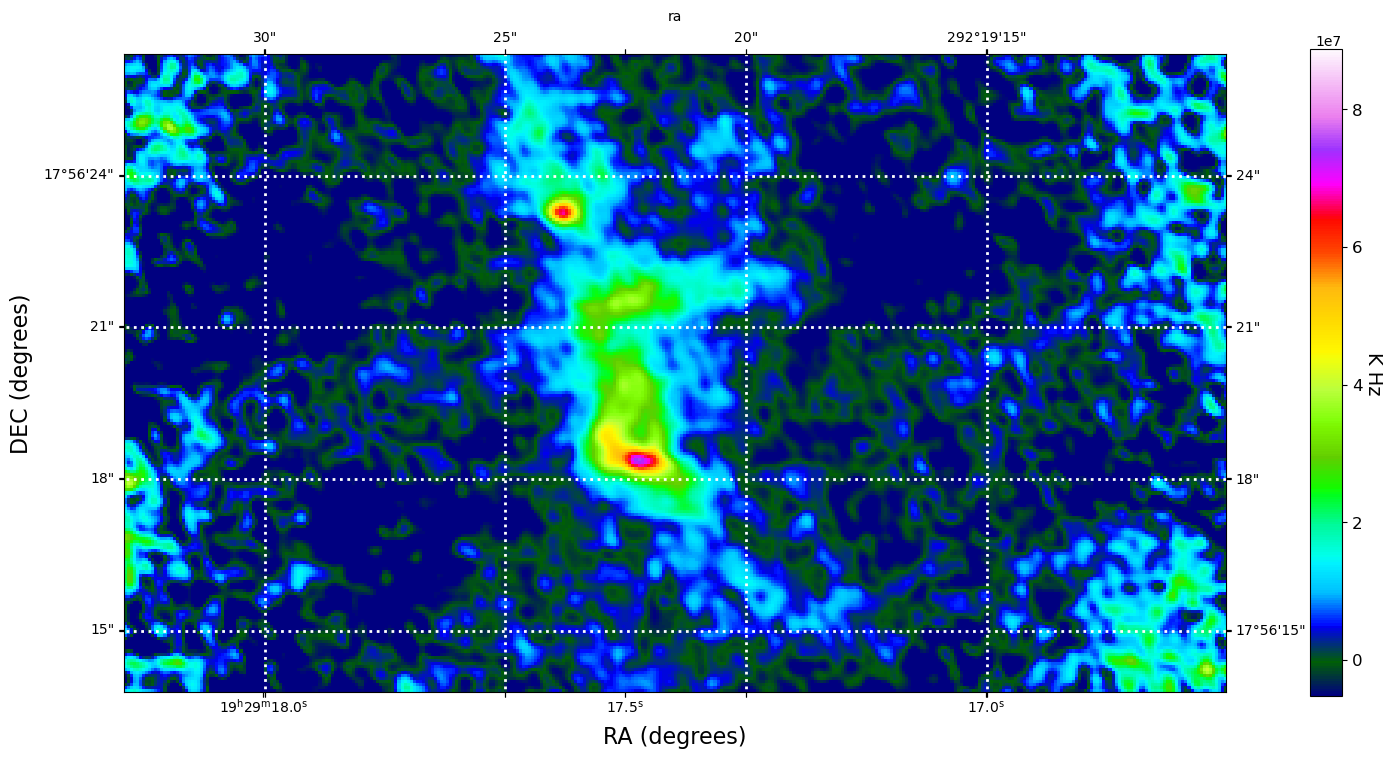

In [1]:
#SPW 0 moment 0 maps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW0.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube.allow_huge_operations=True
sub_cube = sub_cube.to(u.K)
## Line 1 ##
sub_cube_slab_l1 = sub_cube.spectral_slab(3.355437e+11 * u.Hz, 3.35560e+11 * u.Hz)
print(sub_cube_slab_l1)
# sub_cube_slab_l1 = sub_cube_slab_l1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 336.254300000 * u.GHz )
moment_0_l1 = sub_cube_slab_l1.moment(order=0)  
moment_0_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_line1_moment0.fits", overwrite = True)

## Line 2 ##
sub_cube_slab_l2 = sub_cube.spectral_slab(3.3682683e+11 * u.Hz, 3.36854592e+11 * u.Hz)
print(sub_cube_slab_l2)
# sub_cube_slab_l2 = sub_cube_slab_l2.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 336.254300000 * u.GHz )
moment_0_l2 = sub_cube_slab_l2.moment(order=0)  
moment_0_l2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_line2_moment0.fits", overwrite = True)

## Line 3 ##
sub_cube_slab_l3 = sub_cube.spectral_slab(3.37029e+11 * u.Hz, 3.370485e+11 * u.Hz)
print(sub_cube_slab_l3)
# sub_cube_slab_l3 = sub_cube_slab_l3.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 336.254300000 * u.GHz )
# print(sub_cube_slab_l3)
moment_0_l3 = sub_cube_slab_l3.moment(order=0)  
moment_0_l3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_line3_moment0.fits", overwrite = True)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=moment_0_l3.wcs)

# Display the moment map image
im = ax.imshow(moment_0_l3.hdu.data, cmap='gist_ncar', vmin=-0.5316e+007, vmax=8.8691e+007)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("RA (degrees)", fontsize=16)
ax.set_ylabel("DEC (degrees)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.06, shrink = 0.7)
cbar.set_label('K Hz', rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)  # Set the font size of the colorbar tick labels)
#cbar.set_label('Velocity (km/s)', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
# overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
# overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\line1_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\line2_moment0.png")
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\line3_moment0.png")

SPW1

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 333408013533.900 Hz:335281842048.600 Hz
SpectralCube with shape=(19, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     19  type_s: FREQ      unit_s: Hz     range: 334639330760.078 Hz:334656907056.725 Hz
SpectralCube with shape=(21, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     21  type_s: FREQ      unit_s: Hz     range: 335061161879.594 Hz:335080691098.090 Hz


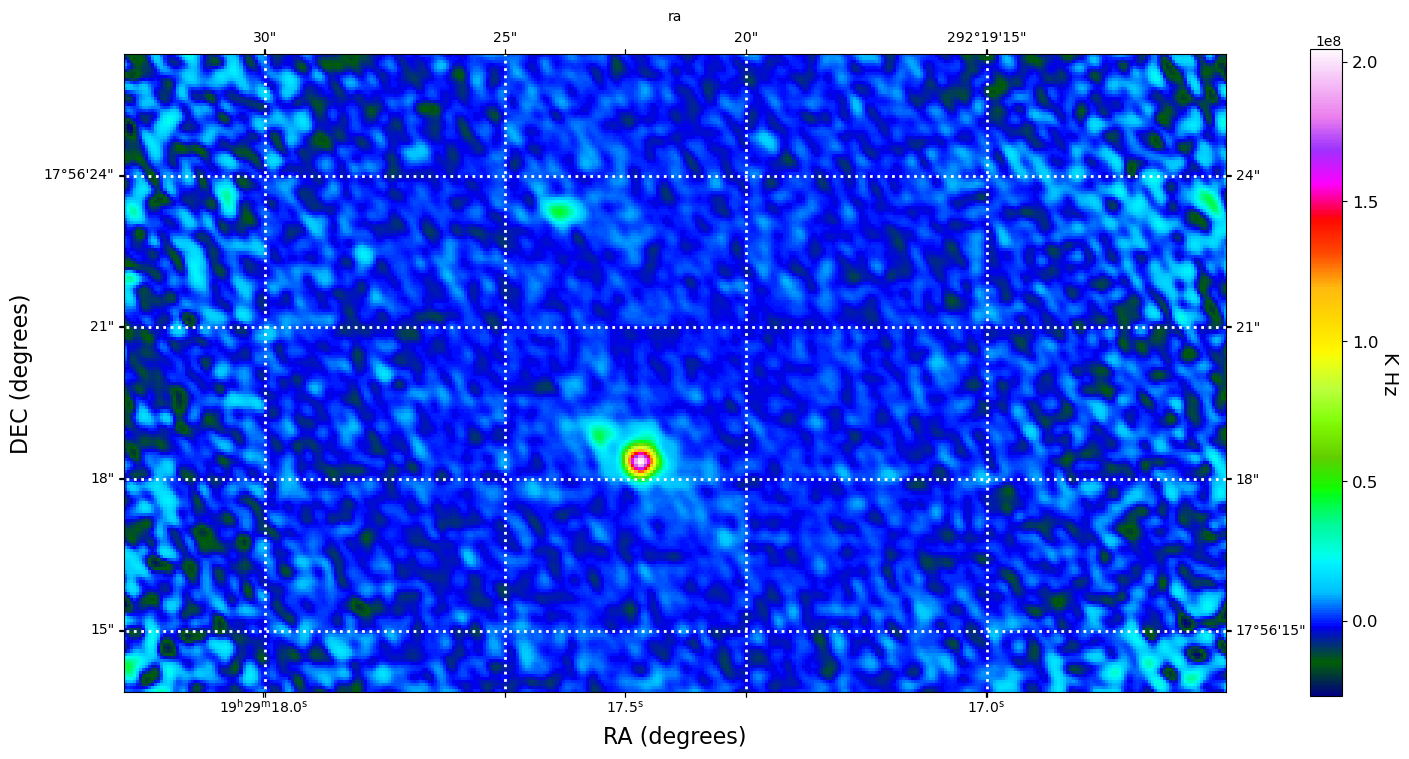

In [1]:
#SPW 1 moment 0 maps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW1.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube.allow_huge_operations=True
sub_cube = sub_cube.to(u.K)
## Line 1 ##
sub_cube_slab_l1 = sub_cube.spectral_slab(3.3463913e+11 * u.Hz, 3.3465718e+11 * u.Hz)
print(sub_cube_slab_l1)

moment_0_l1 = sub_cube_slab_l1.moment(order=0)  
moment_0_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_line1_moment0.fits", overwrite = True)

## Line 2 ##
sub_cube_slab_l2 = sub_cube.spectral_slab(3.3506129e+11 * u.Hz, 3.3508057e+11 * u.Hz)
print(sub_cube_slab_l2)

moment_0_l2 = sub_cube_slab_l2.moment(order=0)  
moment_0_l2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_line2_moment0.fits", overwrite = True)

# Display #
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=moment_0_l2.wcs)

# Display the moment map image
im = ax.imshow(moment_0_l2.hdu.data, cmap='gist_ncar', vmin=-2.69719e+007, vmax=2.04314e+008)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("RA (degrees)", fontsize=16)
ax.set_ylabel("DEC (degrees)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.06, shrink = 0.7)
cbar.set_label('K Hz', rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)  # Set the font size of the colorbar tick labels)
#cbar.set_label('Velocity (km/s)', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
# overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
# overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\line1_moment0.png")
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\line2_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\line3_moment0.png")

SPW2

In [1]:
#SPW 2 moment 0 maps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab
sub_cube.allow_huge_operations=True
sub_cube = sub_cube.to(u.K)
## Line 1 ##
sub_cube_slab_l1 = sub_cube.spectral_slab(3.472853e+11 * u.Hz, 3.47330e+11 * u.Hz)
print(sub_cube_slab_l1)

moment_0_l1 = sub_cube_slab_l1.moment(order=0)  
moment_0_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_line1_moment0.fits", overwrite = True)

## Line 2 ##
sub_cube_slab_l2 = sub_cube.spectral_slab(3.4849814e+11 * u.Hz, 3.4851598e+11 * u.Hz)
print(sub_cube_slab_l2)

moment_0_l2 = sub_cube_slab_l2.moment(order=0)  
moment_0_l2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_line2_moment0.fits", overwrite = True)

## Line 3 ##
sub_cube_slab_l3 = sub_cube.spectral_slab(3.4907e+11 * u.Hz, 3.4909547e+11 * u.Hz)
print(sub_cube_slab_l3)

moment_0_l3 = sub_cube_slab_l3.moment(order=0)  
moment_0_l3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_line3_moment0.fits", overwrite = True)

%matplotlib qt
# Display #
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=moment_0_l3.wcs)

# Display the moment map image
im = ax.imshow(moment_0_l3.hdu.data, cmap='gist_ncar', vmin=-4.49804e+007, vmax=3.606e+008)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("RA (degrees)", fontsize=16)
ax.set_ylabel("DEC (degrees)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.06, shrink = 0.7)
cbar.set_label('K Hz', rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)  # Set the font size of the colorbar tick labels)
#cbar.set_label('Velocity (km/s)', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
# overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
# overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

#plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\line1_moment0.png")
#plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\line2_moment0.png")
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\line3_moment0.png")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
SpectralCube with shape=(47, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     47  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:347329814810.135 Hz
SpectralCube with shape=(20, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     20  type_s: FREQ      unit_s: Hz     range: 348497662076.056 Hz:348516214833.625 Hz
SpectralCube with shape=(

SPW3

In [1]:
#SPW 3 moment 0 maps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)
#cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab

## Line 1 ##
sub_cube_slab_l1 = sub_cube.spectral_slab(3.457155e+11 * u.Hz, 3.4586e+11 * u.Hz)
print(sub_cube_slab_l1)

moment_0_l1 = sub_cube_slab_l1.moment(order=0)  
moment_0_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_line1_moment0.fits", overwrite = True)

## Line 2 ##
sub_cube_slab_l2 = sub_cube.spectral_slab(3.4648792e+11 * u.Hz, 3.4653e+11 * u.Hz)
print(sub_cube_slab_l2)

moment_0_l2 = sub_cube_slab_l2.moment(order=0)  
moment_0_l2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_line2_moment0.fits", overwrite = True)

## Line 3 ##
sub_cube_slab_l3 = sub_cube.spectral_slab(3.4696378e+11 * u.Hz, 3.4698224e+11 * u.Hz)
print(sub_cube_slab_l3)

moment_0_l3 = sub_cube_slab_l3.moment(order=0)  
moment_0_l3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_line3_moment0.fits", overwrite = True)

## Line 4 ##
sub_cube_slab_l4 = sub_cube.spectral_slab(3.45747e+011 * u.Hz, 3.45761e+011 * u.Hz)
print(sub_cube_slab_l4)
 
moment_0_l4 = sub_cube_slab_l4.moment(order=0)  
moment_0_l4.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_line4_moment0.fits", overwrite = True)
%matplotlib qt
# Display #
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=moment_0_l1.wcs)

# Display the moment map image
im = ax.imshow(moment_0_l1.hdu.data, cmap='gist_ncar', vmin=150051.0, vmax=1565700.0)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("RA (degrees)", fontsize=16)
ax.set_ylabel("DEC (degrees)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.06, shrink = 0.7)
cbar.set_label('K Hz', rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=12)  # Set the font size of the colorbar tick labels)
#cbar.set_label('Velocity (km/s)', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
# overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
# overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\line1_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\line2_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\line3_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\line4_moment0.png")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(149, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    149  type_s: FREQ      unit_s: Hz     range: 345715719176.999 Hz:345860235393.870 Hz
SpectralCube with shape=(44, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     44  type_s: FREQ      unit_s: Hz     range: 346488099768.519 Hz:346530087588.286 Hz
Spectral

In [10]:
#SPW 3 LINE (CO (3-2)) MAP CHANNEL
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import simple_norm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.wcs.utils import skycoord_to_pixel
from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)


print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])
#Freq Slab

## Line 1 ##
cube_slab_l1 = sub_cube.spectral_slab(3.457155e+11 * u.Hz, 3.4586e+11 * u.Hz)
cube_slab_l1 = cube_slab_l1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 345.796 * u.GHz )
cube_slab_l1 = cube_slab_l1.to(u.K)
print(cube_slab_l1)
cube_slab_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CO3_2.fits", overwrite = True)

cube_slab_l1.allow_huge_operations = True


#rms = cube_slab_l1.std().value
#print(rms)
#mask = cube_slab_l1 > 2 * rms* u.Jy/u.beam
#cube_slab_l1_masked = cube_slab_l1.with_mask(mask)


spec_axis = cube_slab_l1.spectral_axis
# cube.allow_huge_operations=True
print(spec_axis.unit)
average_spectrum = cube_slab_l1.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_COspec.png")

desired_velocity_1 = -10 * u.km/u.s
desired_velocity_2 = 45 * u.km/u.s
velocities = cube_slab_l1.spectral_axis

velocity_index_1 = np.argmin(np.abs(velocities - desired_velocity_1))
velocity_index_2 = np.argmin(np.abs(velocities - desired_velocity_2))
print(velocity_index_1, velocity_index_2)

wcs = WCS(cube_slab_l1[0].header)

velocity_range = velocities[25:105]
print(velocity_range)
moment_0_list = []
channel_text_list = []
e = 5
for i in range(0, len(velocity_range)-5,5):
    sub_cube_slab_l1 = cube_slab_l1.spectral_slab(velocity_range[i], velocity_range[i + e])
    moment_0 = sub_cube_slab_l1.moment(order=0)
    moment_0_list.append(moment_0) 
    channel_text = f"{velocity_range[i].value:.2f} km/s to {velocity_range[i+e].value:.2f} km/s"
    # print(channel_text)
    channel_text_list.append(channel_text)
def plot_channel_map(ax, data, title):
    # norm = simple_norm(data,  vmax = 1.04845 , vmin = -1.13939)
    im = ax.imshow(data, origin='lower', cmap='inferno',  vmin = 0, vmax = 100)
    ax.set_title(title, fontsize = 0)
    ax.axis('off')
    return im
nx= 5
ny= 3
# Create a 4x4 grid for channel maps
fig, axes = plt.subplots(nx, ny, figsize=(8, 8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.02, wspace=0.02)  # Adjust spacing between subplots
axes = axes.flatten()

for i, (moment_0, ax) in enumerate(zip(moment_0_list[:15], axes)):
    im = plot_channel_map(ax, moment_0.data, f'Moment 0 Map {i+1}')
    ax.text(0.05, 0.95, channel_text_list[i], transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    # Define your RA and Dec positions
markers = [
    (292.3228458143186, 17.938437708717977),
    (292.3230340253614, 17.938573544563816),
    #(292.322839183666, 17.938842611123096),
    #(292.3231449096992, 17.93910077875585),
    #(292.3229104107483, 17.9393754965526),
    #(292.3232771181502, 17.939797102178446),
    #(292.3234473518072, 17.93997240535316)
]

# Convert RA and Dec to SkyCoord
coords = SkyCoord([ra for ra, dec in markers], [dec for ra, dec in markers], unit=(u.deg, u.deg))

# Transform RA/Dec to pixel coordinates
wcs = sub_cube.wcs

# Add markers to the plot
for ax in fig.axes:
    for coord in coords:
        x_pix, y_pix = skycoord_to_pixel(coord, wcs)
        ax.plot(x_pix, y_pix, marker='x', color='white', markersize=5)

# Adjust layout and add colorbar
#fig.tight_layout()
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.02)
cbar.set_label('K.km/s')
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_CHANNELMAP.png")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(149, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:      -55.690 km / s:      69.601 km / s


km / s


94 29
[ 48.43663529  47.59007946  46.74352363  45.8969678   45.05041196
  44.20385613  43.3573003   42.51074446  41.66418863  40.8176328
  39.97107697  39.12452113  38.2779653   37.43140947  36.58485363
  35.7382978   34.89174197  34.04518613  33.1986303   32.35207447
  31.50551864  30.6589628   29.81240697  28.96585114  28.1192953
  27.27273947  26.42618364  25.57962781  24.73307197  23.88651614
  23.03996031  22.19340447  21.34684864  20.50029281  19.65373698
  18.80718114  17.96062531  17.11406948  16.26751364  15.42095781
  14.57440198  13.72784615  12.88129031  12.03473448  11.18817865
  10.34162281   9.49506698   8.64851115   7.80195532   6.95539948
   6.10884365   5.26228782   4.41573198   3.56917615   2.72262032
   1.87606449   1.02950865   0.18295282  -0.66360301  -1.51015885
  -2.35671468  -3.20327051  -4.04982634  -4.89638218  -5.74293801
  -6.58949384  -7.43604968  -8.28260551  -9.12916134  -9.97571718
 -10.82227301 -11.66882884 -12.51538467 -13.36194051 -14.20849634
 -15.0

In [17]:
#SPW 2 SiO CHANNEL Map

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.wcs.utils import skycoord_to_pixel


from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)

print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])


## Line 1 ##
cube_slab_l1 = sub_cube.spectral_slab(3.472853e+11 * u.Hz, 3.47340e+11 * u.Hz)
cube_slab_l1 = cube_slab_l1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 347.331 * u.GHz )
print(cube_slab_l1)
cube_slab_l1 = cube_slab_l1.to(u.K)
print(cube_slab_l1)
cube_slab_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits", overwrite = True)

cube_slab_l1.allow_huge_operations = True


%matplotlib qt

spec_axis = cube_slab_l1.spectral_axis
print(spec_axis.unit)
average_spectrum = cube_slab_l1.mean(axis=(1, 2))

# Smooth the spectrum using a Gaussian filter
kernel = Gaussian1DKernel(stddev=2)  # You can adjust the standard deviation as needed
smoothed_spectrum = convolve(average_spectrum, kernel)

plt.figure()
plt.plot(spec_axis, smoothed_spectrum, label='Smoothed Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(smoothed_spectrum.unit))
plt.title('Smoothed Average Spectrum of Data Cube Slab')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiOspec_smoothed.png")

wcs = cube_slab_l1.wcs 

desired_velocity_1 = 0 * u.km/u.s
desired_velocity_2 = 37 * u.km/u.s
velocities = cube_slab_l1.spectral_axis

velocity_index_1 = np.argmin(np.abs(velocities - desired_velocity_1))
velocity_index_2 = np.argmin(np.abs(velocities - desired_velocity_2))
print(velocity_index_1, velocity_index_2)


velocity_range = velocities[2:50]
print(velocity_range)
moment_0_list = []
channel_text_list = []
e = 3
for i in range(0, len(velocity_range)-3,3):
    sub_cube_slab_l1 = cube_slab_l1.spectral_slab(velocity_range[i], velocity_range[i+e])
    moment_0 = sub_cube_slab_l1.moment(order=0)
    moment_0_list.append(moment_0) 
    # print(sub_cube_slab_l1)
    channel_text = f"{velocity_range[i].value:.2f} km/s to {velocity_range[i+e].value:.2f} km/s"
    # print(channel_text)
    channel_text_list.append(channel_text)
# print(channel_text_list)
def plot_channel_map(ax, data, title):
    # norm = simple_norm(data,  vmax = 1.04845 , vmin = -1.13939)
    im = ax.imshow(data, origin='lower', cmap='gist_earth',  vmin = 0 , vmax =20)
    ax.set_title(title, fontsize = 0)
    ax.axis('off') 
    return im
    
nx= 5
ny= 3
# Create a 4x4 grid for channel maps
fig, axes = plt.subplots(nx, ny, figsize=(8, 8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.02, wspace=0.02)  # Adjust spacing between subplots
axes = axes.flatten()

for i, (moment_0, ax) in enumerate(zip(moment_0_list[:15], axes)):
    im = plot_channel_map(ax, moment_0.data, f'Moment 0 Map {i+1}')
    ax.text(0.05, 0.95, channel_text_list[i], transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Define your RA and Dec positions
markers = [
    (292.3228458143186, 17.938437708717977),
    (292.3230340253614, 17.938573544563816),
    #(292.322839183666, 17.938842611123096),
    #(292.3231449096992, 17.93910077875585),
    #(292.3229104107483, 17.9393754965526),
    #(292.3232771181502, 17.939797102178446),
    #(292.3234473518072, 17.93997240535316)
]

# Convert RA and Dec to SkyCoord
coords = SkyCoord([ra for ra, dec in markers], [dec for ra, dec in markers], unit=(u.deg, u.deg))

# Transform RA/Dec to pixel coordinates
wcs = sub_cube.wcs

# Add markers to the plot
for ax in fig.axes:
    for coord in coords:
        x_pix, y_pix = skycoord_to_pixel(coord, wcs)
        ax.plot(x_pix, y_pix, marker='x', color='red', markersize=5)


# Adjust layout and add colorbar
#fig.tight_layout()
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.02)
cbar.set_label('K.Km/s')
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_CHANNELMAP.png")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
SpectralCube with shape=(57, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
SpectralCube with shape=(57, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
km / s


47 3
[38.10681539 37.26400084 36.42118629 35.57837174 34.73555719 33.89274263
 33.04992808 32.20711353 31.36429898 30.52148443 29.67866988 28.83585533
 27.99304078 27.15022623 26.30741168 25.46459713 24.62178258 23.77896802
 22.93615347 22.09333892 21.25052437 20.40770982 19.56489527 18.72208072
 17.87926617 17.03645162 16.19363707 15.35082252 14.50800797 13.66519341
 12.82237886 11.97956431 11.13674976 10.29393521  9.45112066  8.60830611
  7.76549156  6.92267701  6.07986246  5.23704791  4.39423336  3.55141881
  2.70860425  1.8657897   1.02297515  0.1801606  -0.66265395 -1.5054685 ] km / s


In [6]:
# SiO Line Division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits"
cube = SpectralCube.read(filename)
print(cube)

spec_axis = cube.spectral_axis
print(spec_axis.unit)
average_spectrum = cube.mean(axis=(1, 2))
%matplotlib qt

kernel = Gaussian1DKernel(stddev=2)  # You can adjust the standard deviation as needed
smoothed_spectrum = convolve(average_spectrum, kernel)

plt.figure()
plt.plot(spec_axis, smoothed_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(smoothed_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
plt.show()

cube_slab_1 = cube.spectral_slab(10 * u.km/u.s, 18 * u.km/u.s)
cube_slab_2 = cube.spectral_slab(10 * u.km/u.s, 28 * u.km/u.s)
cube_slab_3 = cube.spectral_slab(28 * u.km/u.s, 38 * u.km/u.s)

# cube_slab_1 = cube.spectral_slab(10 * u.km/u.s, 18 * u.km/u.s)
# cube_slab_2 = cube.spectral_slab(10 * u.km/u.s, 28 * u.km/u.s)
# cube_slab_3 = cube.spectral_slab(28 * u.km/u.s, 38 * u.km/u.s)

cube_slab_1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing1_CUBE.fits", overwrite = True)
cube_slab_3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2_CUBE.fits", overwrite = True)

# moment0_1 = cube_slab_1.moment(order=0)
# moment0_2 = cube_slab_2.moment(order=0)
# moment0_3 = cube_slab_3.moment(order=0)

# moment0_1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing1.fits", overwrite = True)
# moment0_2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_linecenter.fits", overwrite = True)
# moment0_3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits", overwrite = True)

print(cube_slab_1)
print(cube_slab_2)
print(cube_slab_3)

SpectralCube with shape=(57, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
km / s


SpectralCube with shape=(10, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     10  type_s: VRAD      unit_s: km / s  range:       10.294 km / s:      17.879 km / s
SpectralCube with shape=(22, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     22  type_s: VRAD      unit_s: km / s  range:       10.294 km / s:      27.993 km / s
SpectralCube with shape=(13, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     13  type_s: VRAD      unit_s: km / s  range:       27.993 km / s:      38.107 km / s


In [6]:
# CO Line Division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CO3_2.fits"
cube = SpectralCube.read(filename)
print(cube)

spec_axis = cube.spectral_axis
print(spec_axis.unit)
average_spectrum = cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of Data Cube Slab')
plt.legend()
plt.show()

cube_slab_1 = cube.spectral_slab(-15 * u.km/u.s, 8 * u.km/u.s)
# cube_slab_2 = cube.spectral_slab(20 * u.km/u.s, 25 * u.km/u.s)
cube_slab_3 = cube.spectral_slab(34 * u.km/u.s,  38* u.km/u.s)
cube_slab_1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_wing1_CUBE.fits", overwrite = True)
cube_slab_3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_wing2_CUBE.fits", overwrite = True)

moment0_1 = cube_slab_1.moment(order=0)
# moment0_2 = cube_slab_2.moment(order=0)
moment0_3 = cube_slab_3.moment(order=0)

moment0_1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_wing1.fits", overwrite = True)
# moment0_2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_linecenter.fits", overwrite = True)
moment0_3.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\CO_wing2.fits", overwrite = True)

print(cube_slab_1)
# print(cube_slab_2)
print(cube_slab_3)

SpectralCube with shape=(149, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:    149  type_s: VRAD      unit_s: km / s  range:      -55.690 km / s:      69.601 km / s
km / s


SpectralCube with shape=(28, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     28  type_s: VRAD      unit_s: km / s  range:      -15.055 km / s:       7.802 km / s
SpectralCube with shape=(6, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:      6  type_s: VRAD      unit_s: km / s  range:       34.045 km / s:      38.278 km / s


In [17]:
import numpy as np
from astropy.io import fits

# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data
data = hdu.data

# Define the region of interest (example pixel range)
x_min, x_max = 20, 197  # Example pixel range in X-axis
y_min, y_max = 48, 180  # Example pixel range in Y-axis

# Extract the data within the specified region
region_data = data[y_min:y_max, x_min:x_max]

# Calculate mean and standard deviation
mean_value = np.mean(region_data)
std_dev = np.std(region_data)

# Define threshold (> 8 sigma)
threshold =  4 * std_dev

# Mask the data to select values > threshold
mask = (region_data > threshold)

# Sum up pixel values > threshold
sum_values = np.sum(region_data[mask])

# Print the results
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_dev}")
print(f"Threshold (> 4 sigma): {threshold}")
print(f"Sum of pixel values > 4 sigma: {sum_values}")


Mean value: 1.1410118466284713
Standard deviation: 7.416966455431236
Threshold (> 4 sigma): 29.667865821724945
Sum of pixel values > 4 sigma: 14142.506712177234


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


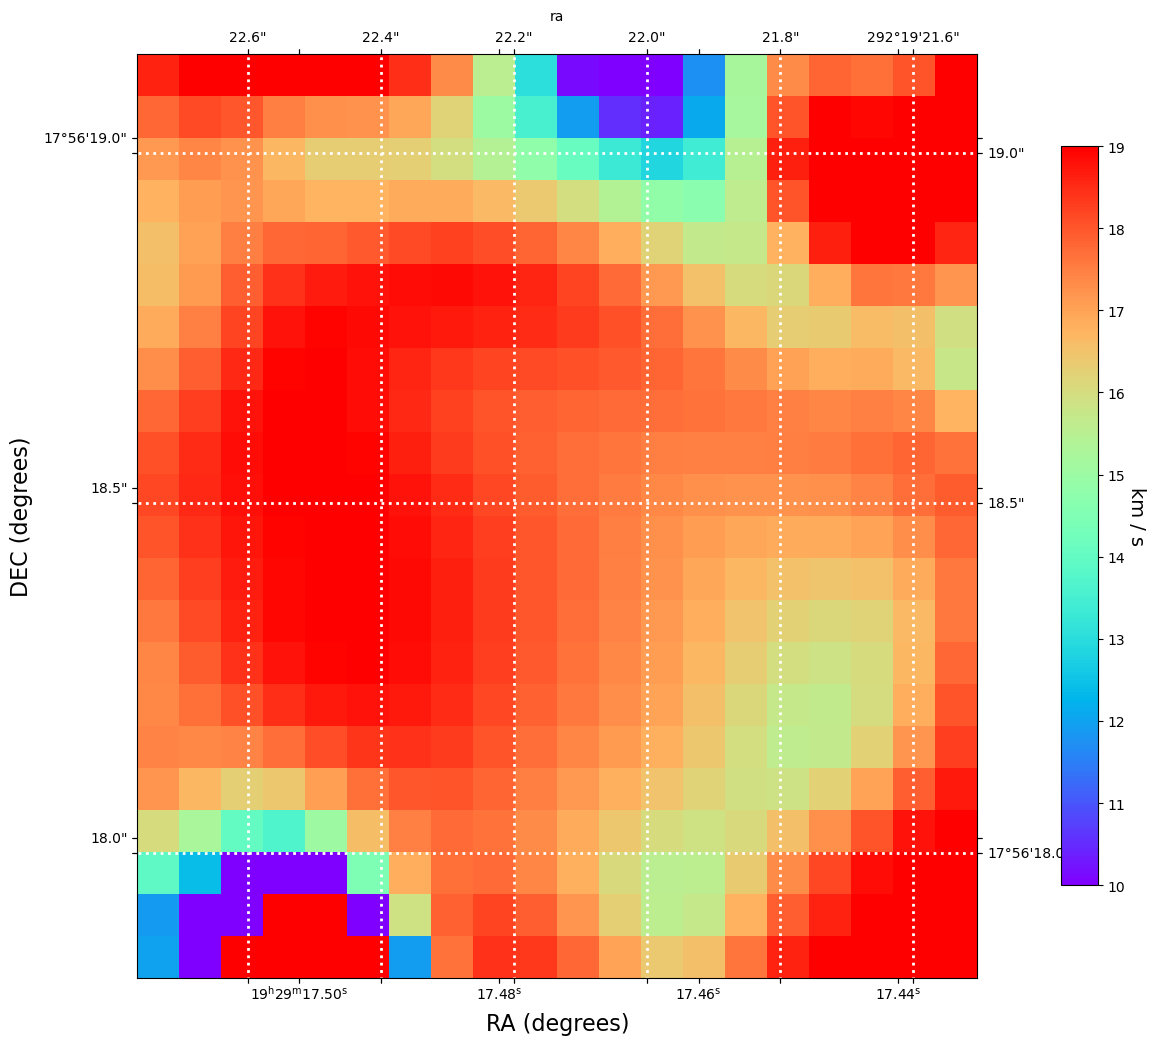

In [20]:
# Display #
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import wcsaxes
from astropy.visualization import ImageNormalize, PercentileInterval
from astropy.wcs import WCS

wing1 = fits.open(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\CH3CCH_moment1.fits")
wing1_data = wing1[0].data
header = wing1[0].header
wcs = WCS(header)
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=wcs)

# Display the moment map image
im = ax.imshow(wing1_data, cmap='rainbow', vmin=10, vmax=19)
#ax.invert_yaxis()  # Flips the Y axis 

# Add axes labels
ax.set_xlabel("RA (degrees)", fontsize=16)
ax.set_ylabel("DEC (degrees)", fontsize=16)

# Add a colorbar
cbar = plt.colorbar(im, pad=.06, shrink = 0.8)
cbar.set_label('km / s', rotation=270, labelpad=15,  fontsize=14)  # Set the font size of the colorbar label
cbar.ax.tick_params(labelsize=10)  # Set the font size of the colorbar tick labels)
#cbar.set_label('Velocity (km/s)', size=16)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
# overlay[0].set_axislabel('Right Ascension (J2000)', fontsize=16)
# overlay[1].set_axislabel('Declination (J2000)', fontsize=16)

# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing1_moment0.png")
# plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_linecenter_moment0.png")
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\CH3CCH_moment1.png")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval
from astropy.wcs import WCS
from skimage.draw import polygon
# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data and header
data = hdu.data
header = hdu.header

# Define the pixel boundaries of the rectangular region
# Example: xmin, xmax, ymin, ymax
xmin, xmax = 23, 200   # Adjust these values as needed
ymin, ymax = 56, 178  # Adjust these values as needed

# Slice the data to extract the region of interest
data_region = data[ymin:ymax, xmin:xmax]

# Create a WCS object for the region of interest
wcs = WCS(header)
wcs_slice = wcs[ymin:ymax, xmin:xmax]

# Set up Matplotlib backend for interactive plot (Qt)
%matplotlib qt

# Display the image with WCS projection for the region of interest
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs_slice)


sigma = np.std(data_region)
print(sigma)

smoothed_data = np.where(data_region > sigma, data_region, 0)

# Normalize the smoothed data for visualization
norm = ImageNormalize(smoothed_data, interval=PercentileInterval(99.5))

# Display the smoothed image
im = ax.imshow(smoothed_data, cmap='gist_ncar', origin='lower', vmin = 5, vmax = 70)

# Show contours on the smoothed image
contour_levels = [10]  # Adjust as needed
contours = ax.contour(data_region, levels=contour_levels, colors='darkcyan')

mask = np.zeros(smoothed_data.shape, dtype=bool)
for path in contours.collections[0].get_paths():
    vertices = path.vertices
    x = vertices[:, 0]
    y = vertices[:, 1]
    rr, cc = polygon(y, x, shape=smoothed_data.shape)
    mask[rr, cc] = True

# Calculate the number of pixels and sum of pixel values within the contour
num_pixels_within_contour = np.sum(mask)
sum_pixel_values_within_contour = np.sum(smoothed_data[mask])

print(f"Number of pixels within the contour: {num_pixels_within_contour}")
print(f"Sum of pixel values within the contour: {sum_pixel_values_within_contour}")

# Create a masked version of the smoothed data
masked_data = np.where(mask, smoothed_data, 0)

# Display the masked data
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(1, 1, 1, projection=wcs_slice)
im2 = ax2.imshow(masked_data, cmap='RdBu', origin='lower', norm=norm)
plt.colorbar(im2, ax=ax2, orientation='vertical')

# Optionally, add more customizations
ax.grid(color='white', ls='dotted')
plt.colorbar(im, ax=ax, orientation='vertical')

ax2.grid(color='white', ls='dotted')


# Set plot labels
ax.set_xlabel("RA (J2000)")
ax.set_ylabel("DEC (J2000)")
ax2.set_xlabel("RA (J2000)")
ax2.set_ylabel("DEC (J2000)")
plt.show()


7.589249848322163


C:\Users\Ayush Shivkumar\AppData\Local\Temp\ipykernel_2680\3149599715.py:51: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for path in contours.collections[0].get_paths():


Number of pixels within the contour: 6535
Sum of pixel values within the contour: 33452.17468349316


In [41]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

# Load your FITS file
fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SiO_wing2.fits"
hdu = fits.open(fits_file)[0]  # Assuming image is in the primary HDU

# Extract the data and WCS information
data = hdu.data
wcs = WCS(hdu.header)

# Define the region of interest in WCS coordinates (example WCS range)
ra_min1, ra_max1 = 292.3254728, 292.3223595  # Example RA range in degrees
dec_min1, dec_max1 = 17.93797024, 17.94017687    # Example Dec range in degrees

ra_min2, ra_max2 = 292.3224327, 292.3204559  # Example RA range in degrees
dec_min2, dec_max2 = 17.93731502, 17.93868381    # Example Dec range in degrees


# Convert WCS coordinates to pixel coordinates
pixel_coords_min1 = wcs.wcs_world2pix([[ra_min1, dec_min1]], 1)[0]
pixel_coords_max1 = wcs.wcs_world2pix([[ra_max1, dec_max1]], 1)[0]

# Convert WCS coordinates to pixel coordinates
pixel_coords_min2 = wcs.wcs_world2pix([[ra_min2, dec_min2]], 1)[0]
pixel_coords_max2 = wcs.wcs_world2pix([[ra_max2, dec_max2]], 1)[0]

# Ensure the pixel coordinates are within the image bounds
x_min1, y_min1 = np.floor(pixel_coords_min1).astype(int)
x_max1, y_max1 = np.ceil(pixel_coords_max1).astype(int)

# Ensure the pixel coordinates are within the image bounds
x_min2, y_min2 = np.floor(pixel_coords_min2).astype(int)
x_max2, y_max2 = np.ceil(pixel_coords_max2).astype(int)

# Clip the coordinates to the image dimensions
x_min1 = max(0, x_min1)
y_min1 = max(0, y_min1)
x_max1 = min(data.shape[1], x_max1)
y_max1= min(data.shape[0], y_max1)

x_min2 = max(0, x_min2)
y_min2 = max(0, y_min2)
x_max2 = min(data.shape[1], x_max2)
y_max2= min(data.shape[0], y_max2)

# Extract the data within the specified region
region_data1 = data[y_min1:y_max1, x_min1:x_max1]

region_data2 = data[y_min2:y_max2, x_min2:x_max2]

# Calculate mean and standard deviation
mean_value1 = np.mean(region_data1)
std_dev1 = np.std(region_data1)

mean_value2 = np.mean(region_data2)
std_dev2 = np.std(region_data2)

# Define threshold (> 4 sigma)
threshold1 = 3 * std_dev1

threshold2 = 3 * std_dev2

# Mask the data to select values > threshold
mask1 = (region_data1 > threshold1)
mask2 = (region_data2 > threshold2)

# Sum up pixel values > threshold
sum_values1 = np.sum(region_data1[mask1])

sum_values2 = np.sum(region_data2[mask2])

# Print the results
print(f"Mean value: {mean_value1}")
print(f"Standard deviation: {std_dev1}")
print(f"Threshold (> 4 sigma): {threshold1}")
print(f"Sum of pixel values > 4 sigma: {sum_values1} K km/s")

print(f"Mean value2: {mean_value2}")
print(f"Standard deviation2: {std_dev2}")
print(f"Threshold (> 4 sigma)2: {threshold2}")
print(f"Sum of pixel values TWO > 4 sigma: {sum_values2} K km/s")

# Print the region in pixel coordinates
print(f"Region in pixel coordinates: x_min={x_min1}, x_max={x_max1}, y_min={y_min1}, y_max={y_max1}")
print(f"Region in pixel coordinates: x_min={x_min2}, x_max={x_max2}, y_min={y_min2}, y_max={y_max2}")


Mean value: 1.1056556400200368
Standard deviation: 7.370704334215403
Threshold (> 4 sigma): 22.112113002646208
Sum of pixel values > 4 sigma: 19695.8270472245 K km/s
Mean value2: 0.047794779886416484
Standard deviation2: 3.0238452732960677
Threshold (> 4 sigma)2: 9.071535819888203
Sum of pixel values TWO > 4 sigma: 458.03420960282295 K km/s
Region in pixel coordinates: x_min=19, x_max=198, y_min=49, y_max=182
Region in pixel coordinates: x_min=192, x_max=306, y_min=9, y_max=92


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [42]:
def N_sio():
    return (6.0162 * 10**9 * (T_ex + 0.3477) * np.exp(Eu/T_ex) * (Tdv))
    
Tdv = sum_pixel_values_within_contour * 10**-5
k = 1.38 * 10**-23 #J/K 
freq = 347.331 * 10 **9 # /s
S = 0.4706 #J/2J+1
dip = 3.1 * 10**-24 #debye
Qrot = 17.58928
gj = 17 #2J+1
gk = 1
gl = 1
Eu = 75.01697 #Splatalogue
T_ex = 18 # Kelvin

print("The SiO (8-7) column density of Left Outflow is: %e" %(N_sio()))

# print(abs(ra_min1 - ra_max1))
# print(abs(dec_min1 - dec_max1))

solidangle_subtended_1pixel = 8.4615945e-14 # 0.06 arcsec to steradian

solid_angle =  (num_pixels_within_contour) * solidangle_subtended_1pixel 

print("The solid angle subtended by Left outflow: %e steradian" %(solid_angle))

def M_sio():
    return ((d**2/(SiO_H2_ratio)) * m_avg_h2 * (N_sio() * solid_angle))
Msol =  1.9884 * 10**30
d = 2.2 * 10**3 * 3.086e+18 # In cm
SiO_H2_ratio = 1.8 * 10**-10
m_avg_h2 = 3.869058665E-27 # 2.33 atomic units in Kg

print("The SiO(8-7) Left Outflow Mass is: %f solar masses" %(M_sio()/Msol))

The SiO (8-7) column density of Left Outflow is: 2.383955e+12
The solid angle subtended by Left outflow: 5.529652e-10 steradian
The SiO(8-7) Left Outflow Mass is: 0.656844 solar masses


VELOCITY OF SIO LOBES - FIRST PART: LEFT OUTFLOW (WING 2) - RED LOBE

In [6]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - WING 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits"
cube = SpectralCube.read(filename)
print(cube)

lon_range = [292.3253525, 292.322747] * u.deg 
lat_range = [17.93830844, 17.94012173] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (WING 2)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SiO WING 2')
plt.legend()
plt.show()


# Calculate the cumulative flux
cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
median_velocity_leftlobe = spec_axis[median_index]

print(f"The median velocity is {median_velocity_leftlobe:.2f}")

SpectralCube with shape=(57, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
SpectralCube with shape=(57, 110, 150) and unit=K:
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.325358 deg
 n_y:    110  type_y: DEC--SIN  unit_y: deg    range:    17.938303 deg:   17.940119 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
km / s


The median velocity is 24.62 km / s


VELOCITY OF SIO LOBES - SECOND PART: RIGHT OUTFLOW (WING 1) - BLUE LOBE

In [7]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - WING 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits"
cube = SpectralCube.read(filename)
print(cube)

lon_range = [292.3230297, 292.3202851] * u.deg 
lat_range = [17.93728685, 17.93877295] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (WING 1)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SiO WING 1')
plt.legend()
plt.show()


# Calculate the cumulative flux
cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
median_velocity_rightlobe = spec_axis[median_index]

print(f"The median velocity is {median_velocity_rightlobe:.2f}")


SpectralCube with shape=(57, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
SpectralCube with shape=(57, 90, 158) and unit=K:
 n_x:    158  type_x: RA---SIN  unit_x: deg    range:   292.320278 deg:  292.323028 deg
 n_y:     90  type_y: DEC--SIN  unit_y: deg    range:    17.937286 deg:   17.938769 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
km / s
The median velocity is 20.41 km / s


VELOCITY OF SIO LOBES - THIRD PART: CORE SPECTRUM

In [8]:
# FIND MEDIAN VELOCITY OF RED SIO LOBE - WING 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits"
cube = SpectralCube.read(filename)
print(cube)

lon_range = [292.3229818, 292.3226893] * u.deg 
lat_range = [17.9382991, 17.93855499] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
print(sub_cube)

spec_axis = sub_cube.spectral_axis
print(spec_axis.unit)
average_spectrum = sub_cube.mean(axis=(1, 2))
%matplotlib qt
plt.figure()
plt.plot(spec_axis, average_spectrum, label='Average Spectrum (CORE)')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SiO CORE')
plt.legend()
plt.show()


# Calculate the cumulative flux
cumulative_flux = np.cumsum(average_spectrum.value)

# Normalize the cumulative flux to range from 0 to 1
cumulative_flux /= cumulative_flux[-1]

# Find the index where cumulative flux is closest to 0.5
median_index = np.argmin(np.abs(cumulative_flux - 0.5))

# Get the corresponding median velocity
median_velocity_core = spec_axis[median_index]

print(f"The median velocity is {median_velocity_core:.2f}")


SpectralCube with shape=(57, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
SpectralCube with shape=(57, 16, 17) and unit=K:
 n_x:     17  type_x: RA---SIN  unit_x: deg    range:   292.322695 deg:  292.322975 deg
 n_y:     16  type_y: DEC--SIN  unit_y: deg    range:    17.938303 deg:   17.938553 deg
 n_s:     57  type_s: VRAD      unit_s: km / s  range:       -7.405 km / s:      39.792 km / s
km / s
The median velocity is 22.94 km / s


Velocity of Outflows

In [9]:
# Velocity of Left Outflow

vel_leftoutflow = abs(median_velocity_leftlobe - median_velocity_core)

# Velocity of Eight Outflow

vel_rightoutflow = abs(median_velocity_rightlobe - median_velocity_core)

print(vel_leftoutflow, vel_rightoutflow)

1.6856291016439613 km / s 2.5284436524659384 km / s


OUTFLOW MOMENTUM

In [ ]:
# Left Outflow Momentum
p_leftoutflow = 

In [1]:
# Possible SO2 FITS making

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.wcs.utils import skycoord_to_pixel


from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)

print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])


## Line 1 ##
cube_slab_l1 = sub_cube.spectral_slab(3.4647e+11 * u.Hz, 3.4653e+11 * u.Hz)
cube_slab_l1 = cube_slab_l1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 346.52348 * u.GHz )
print(cube_slab_l1)
cube_slab_l1 = cube_slab_l1.to(u.K)
print(cube_slab_l1)
cube_slab_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_SO2.fits", overwrite = True)

cube_slab_l1.allow_huge_operations = True


%matplotlib qt

spec_axis = cube_slab_l1.value.spectral_axis
print(spec_axis.unit)
average_spectrum = cube_slab_l1.value.mean(axis=(1, 2))

# Smooth the spectrum using a Gaussian filter
# kernel = Gaussian1DKernel(stddev=2)  # You can adjust the standard deviation as needed
# smoothed_spectrum = convolve(average_spectrum, kernel)


# Plot the spectrum and mark the median, peak, and FWHM
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.axhline(median_value, color='green', linestyle='--', label='Median')
plt.plot(peak_velocity, peak_value, 'ro', label='Peak')
plt.axhline(half_max, color='gray', linestyle='--', label='Half Max')
plt.axvspan(spec_axis[indices_above_half_max[0]], spec_axis[indices_above_half_max[-1]], color='yellow', alpha=0.3, label='FWHM')
plt.legend()
plt.xlabel(f'Spectral Axis ({spec_axis.unit})')
plt.ylabel('Intensity')
plt.title('Spectrum Analysis')
plt.show()

# Print results
print(f"Median value: {median_value}")
print(f"Peak value: {peak_value} at velocity {peak_velocity} {spec_axis.unit}")
print(f"FWHM: {fwhm_velocity} {spec_axis.unit}")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(63, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     63  type_s: VRAD      unit_s: km / s  range:       -5.717 km / s:      46.660 km / s
SpectralCube with shape=(63, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     63  type_s: VRAD      unit_s: km / s  range:       -5.717 km / s:      46.660 km / s


AttributeError: 'SpectralCube' object has no attribute 'value'

In [8]:
# Possible SO2 FITS making

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.wcs.utils import skycoord_to_pixel


from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(filename)

print(cube)
lon_range = [292.3257985, 292.3194568] * u.deg 
lat_range = [17.94065, 17.93717] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])  #, zlo = freq_range[0], zhi=freq_range[1])


## Line 1 ##
cube_slab_l1 = sub_cube.spectral_slab(3.484931e+11 * u.Hz, 3.48522e+11 * u.Hz)
cube_slab_l1 = cube_slab_l1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 348.5282814 * u.GHz )
print(cube_slab_l1)
cube_slab_l1 = cube_slab_l1.to(u.K)
print(cube_slab_l1)
cube_slab_l1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCH.fits", overwrite = True)

cube_slab_l1.allow_huge_operations = True


%matplotlib qt

spec_axis = cube_slab_l1.spectral_axis
print(spec_axis.unit)
average_spectrum = cube_slab_l1.mean(axis=(1, 2))

# Smooth the spectrum using a Gaussian filter
# kernel = Gaussian1DKernel(stddev=2)  # You can adjust the standard deviation as needed
# smoothed_spectrum = convolve(average_spectrum, kernel)

# Plot the spectrum and mark the median, peak, and FWHM
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
# plt.axhline(median_value, color='green', linestyle='--', label='Median')
# plt.plot(peak_velocity, peak_value, 'ro', label='Peak')
# plt.axhline(half_max, color='gray', linestyle='--', label='Half Max')
# plt.axvspan(spec_axis[indices_above_half_max[0]], spec_axis[indices_above_half_max[-1]], color='yellow', alpha=0.3, label='FWHM')
plt.legend()
plt.xlabel(f'Spectral Axis ({spec_axis.unit})')
plt.ylabel('Intensity')
plt.title('Spectrum Analysis')
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCHspec.png")
# Print results
# print(f"Median value: {median_value}")
# print(f"Peak value: {peak_value} at velocity {peak_velocity} {spec_axis.unit}")
# print(f"FWHM: {fwhm_velocity} {spec_axis.unit}")

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
SpectralCube with shape=(31, 210, 363) and unit=Jy / beam:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     31  type_s: VRAD      unit_s: km / s  range:        5.340 km / s:      30.537 km / s
SpectralCube with shape=(31, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     31  type_s: VRAD      unit_s: km / s  range:        5.340 km / s:      30.537 km / s


km / s


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCH.fits"
cube = SpectralCube.read(filename)
print(cube)

lon_range = [292.3229723, 292.3226416] * u.deg 
lat_range = [17.9382832, 17.93863712] * u.deg

sub_cube = cube.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
print(sub_cube)

sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\CH3CCH_Core9CUBE.fits", overwrite = True)

moment0 = sub_cube.moment(order=0)
moment0.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\CH3CCH_moment0.fits", overwrite = True)
print(moment0.unit)

moment1 = sub_cube.moment(order=1)
moment1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\CH3CCH_moment1.fits", overwrite = True)
print(moment1.unit)

SpectralCube with shape=(31, 210, 363) and unit=K:
 n_x:    363  type_x: RA---SIN  unit_x: deg    range:   292.319454 deg:  292.325796 deg
 n_y:    210  type_y: DEC--SIN  unit_y: deg    range:    17.937169 deg:   17.940653 deg
 n_s:     31  type_s: VRAD      unit_s: km / s  range:        5.340 km / s:      30.537 km / s
SpectralCube with shape=(31, 22, 20) and unit=K:
 n_x:     20  type_x: RA---SIN  unit_x: deg    range:   292.322643 deg:  292.322975 deg
 n_y:     22  type_y: DEC--SIN  unit_y: deg    range:    17.938286 deg:   17.938636 deg
 n_s:     31  type_s: VRAD      unit_s: km / s  range:        5.340 km / s:      30.537 km / s
K km / s
km / s


Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\astropy\units\quantity.py", line 982, in to_value
    scale = self.unit._to(unit)
            ^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\astropy\units\core.py", line 1159, in _to
    raise UnitConversionError(f"'{self!r}' is not a scaled version of '{other!r}'")
astropy.units.core.UnitConversionError: 'Unit("K km / s")' is not a scaled version of 'Unit(dimensionless)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\astropy\units\quantity.py", line 1350, in __float__
    return float(self.to_value(dimensionless_unscaled))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\astropy\units\quantity.py", line 985, in to_value
    value = self._to_value(unit, equivalencies)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\astropy\units

In [1]:
# Overplotting Spectra 
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
%matplotlib qt

cube_slab_1 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits")
cube_slab_1.allow_huge_operations = True

spec_axis1 = cube_slab_1.spectral_axis
print(spec_axis1.unit)
average_spectrum1 = cube_slab_1.mean(axis=(1, 2))

cube_slab_2 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCH.fits")
cube_slab_2.allow_huge_operations = True

spec_axis2 = cube_slab_2.spectral_axis
print(spec_axis2.unit)
average_spectrum2 = cube_slab_2.mean(axis=(1, 2))


# Overplot the spectrum and mark the median, peak, and FWHM
plt.plot(spec_axis1, average_spectrum1, color = 'r', label='SiO (8-7)')
plt.plot(spec_axis2, average_spectrum2, color = 'g', label='CH3CCH')
# plt.ylabel('Intensity')
# plt.title('Spectrum Analysis')
plt.grid('blue')
plt.xlabel(f'Spectral Axis ({spec_axis2.unit})')
plt.ylabel('Intensity (K)')
plt.title('SiO (8-7) and CH3CCH Spectra')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\Overplot_SiO_CH3CCH")

km / s
km / s


In [2]:
# Overplotting Spectra
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
%matplotlib qt

cube_slab_1 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_SiO8_7.fits")
cube_slab_1.allow_huge_operations = True

spec_axis1 = cube_slab_1.spectral_axis
print(spec_axis1.unit)
average_spectrum1 = cube_slab_1.mean(axis=(1, 2))
print(average_spectrum1.unit)


cube_slab_2 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CO3_2.fits")
cube_slab_2.allow_huge_operations = True

spec_axis2 = cube_slab_2.spectral_axis
print(spec_axis2.unit)
average_spectrum2 = cube_slab_2.mean(axis=(1, 2))
print(average_spectrum2.unit)

cube_slab_3 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CH3CCH.fits")
cube_slab_3.allow_huge_operations = True

spec_axis3 = cube_slab_3.spectral_axis
print(spec_axis3.unit)
average_spectrum3 = cube_slab_3.mean(axis=(1, 2))
print(average_spectrum3.unit)
# Overplot the spectrum and mark the median, peak, and FWHM
plt.plot(spec_axis1, average_spectrum1, color = 'r', label='SiO (8-7)')
plt.plot(spec_axis2, average_spectrum2, color = 'b', label='CO (3-2)')
plt.plot(spec_axis3, average_spectrum3, color = 'g', label='CH3CCH')
# plt.ylabel('Intensity')
# plt.title('Spectrum Analysis')

plt.xlabel(f'Spectral Axis ({spec_axis2.unit})')
plt.ylabel('Intensity (K)')
plt.grid()
plt.title('SiO (8-7), CO (3-2), CH3CCH spectra')
plt.legend()
plt.show()

plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\Overplot_SiO_CO_CH3CCH")

km / s
K
km / s


K
km / s
K


SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: VRAD      unit_s: km / s  range:     -812.358 km / s:     858.281 km / s


In [9]:
# Average Full Spectra of Cores 9 and 11 (SPW 0) (High accuracy, from dendrogram)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS

from spectral_cube import SpectralCube

cube_9 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_CORE_9_mask.fits")
cube_11 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_CORE_11_mask.fits")
# cube = cube.with_spectral_unit(u.Hz, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube_9)
print(cube_11)

# Obtaining Spectra 
spec_axis_1 = cube_9.spectral_axis.to(u.GHz)
print(spec_axis_1.unit)
average_spectrum_1 = cube_9.mean(axis=(1, 2))

spec_axis_2 = cube_11.spectral_axis.to(u.GHz)
print(spec_axis_2.unit)
average_spectrum_2 = cube_11.mean(axis=(1, 2))


# Offset for Core 9 spectrum
offset = 0.20 * average_spectrum_1.unit # Adjust the value as needed for clarity

# Plot both spectra
plt.figure(figsize=(12, 6))

# Plot Core 9 spectrum
plt.plot(spec_axis_1, average_spectrum_1 + offset, label='Core 9', color='blue')

# Plot Core 11 spectrum
plt.plot(spec_axis_2, average_spectrum_2, label='Core 11', color='red')

# Add labels, title, and legend
plt.xlabel('Frequency ({})'.format(spec_axis_1.unit))
plt.ylabel('Flux Intensity ({})'.format(average_spectrum_1.unit))
plt.title('Spectra of Core 9 and Core 11 (SPW 0)')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig(r'C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\spw0_cores9_11_avgspec.png')

SpectralCube with shape=(1920, 14, 13) and unit=Jy / beam:
 n_x:     13  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.322958 deg
 n_y:     14  type_y: DEC--SIN  unit_y: deg    range:    17.938336 deg:   17.938553 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
SpectralCube with shape=(1920, 5, 7) and unit=Jy / beam:
 n_x:      7  type_x: RA---SIN  unit_x: deg    range:   292.322975 deg:  292.323080 deg
 n_y:      5  type_y: DEC--SIN  unit_y: deg    range:    17.938536 deg:   17.938603 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 335291631929.234 Hz:337165460443.700 Hz
GHz
GHz


In [8]:
# Average Spectra for Core 9 and 11 (SPW 1) (Accurate, dendrogram working)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from spectral_cube import SpectralCube

cube_9 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_CORE_9_mask.fits")
cube_11 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_CORE_11_mask.fits")
# cube = cube.with_spectral_unit(u.Hz, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube_9)
print(cube_11)

# Obtaining Spectra 
spec_axis_1 = cube_9.spectral_axis.to(u.GHz)
print(spec_axis_1.unit)
average_spectrum_1 = cube_9.mean(axis=(1, 2))

spec_axis_2 = cube_11.spectral_axis.to(u.GHz)
print(spec_axis_2.unit)
average_spectrum_2 = cube_11.mean(axis=(1, 2))


# Offset for Core 9 spectrum
offset = 0.10 * average_spectrum_1.unit # Adjust the value as needed for clarity

# Plot both spectra
plt.figure(figsize=(12, 6))

# Plot Core 9 spectrum
plt.plot(spec_axis_1, average_spectrum_1 + offset, label='Core 9', color='blue')

# Plot Core 11 spectrum
plt.plot(spec_axis_2, average_spectrum_2, label='Core 11', color='red')

# Add labels, title, and legend
plt.xlabel('Frequency ({})'.format(spec_axis_1.unit))
plt.ylabel('Flux Intensity ({})'.format(average_spectrum_1.unit))
plt.title('Spectra of Core 9 and Core 11 (SPW 1)')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig(r'C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\spw1_cores9_11_avgspec.png')

SpectralCube with shape=(1920, 14, 13) and unit=Jy / beam:
 n_x:     13  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.322958 deg
 n_y:     14  type_y: DEC--SIN  unit_y: deg    range:    17.938336 deg:   17.938553 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 333408013533.900 Hz:335281842048.600 Hz
SpectralCube with shape=(1920, 5, 7) and unit=Jy / beam:
 n_x:      7  type_x: RA---SIN  unit_x: deg    range:   292.322975 deg:  292.323080 deg
 n_y:      5  type_y: DEC--SIN  unit_y: deg    range:    17.938536 deg:   17.938603 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 333408013533.900 Hz:335281842048.600 Hz
GHz
GHz


In [7]:
# Average Spectra for Core 9 and 11 (SPW 2) (Accurate, dendrogram working)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from spectral_cube import SpectralCube

cube_9 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CORE_9_mask.fits")
cube_11 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CORE_11_mask.fits")
# cube = cube.with_spectral_unit(u.Hz, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube_9)
print(cube_11)

# Obtaining Spectra 
spec_axis_1 = cube_9.spectral_axis.to(u.GHz)
print(spec_axis_1.unit)
average_spectrum_1 = cube_9.mean(axis=(1, 2))

spec_axis_2 = cube_11.spectral_axis.to(u.GHz)
print(spec_axis_2.unit)
average_spectrum_2 = cube_11.mean(axis=(1, 2))


# Offset for Core 9 spectrum
offset = 0.15 * average_spectrum_1.unit # Adjust the value as needed for clarity

# Plot both spectra
plt.figure(figsize=(12, 6))

# Plot Core 9 spectrum
plt.plot(spec_axis_1, average_spectrum_1 + offset, label='Core 9', color='blue')

# Plot Core 11 spectrum
plt.plot(spec_axis_2, average_spectrum_2, label='Core 11', color='red')

# Add labels, title, and legend
plt.xlabel('Frequency ({})'.format(spec_axis_1.unit))
plt.ylabel('Flux Intensity ({})'.format(average_spectrum_1.unit))
plt.title('Spectra of Core 9 and Core 11 (SPW 2)')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig(r'C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\spw2_cores9_11_avgspec.png')

SpectralCube with shape=(1920, 14, 13) and unit=Jy / beam:
 n_x:     13  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.322958 deg
 n_y:     14  type_y: DEC--SIN  unit_y: deg    range:    17.938336 deg:   17.938553 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
SpectralCube with shape=(1920, 5, 7) and unit=Jy / beam:
 n_x:      7  type_x: RA---SIN  unit_x: deg    range:   292.322975 deg:  292.323080 deg
 n_y:      5  type_y: DEC--SIN  unit_y: deg    range:    17.938536 deg:   17.938603 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 347284897607.600 Hz:349158726122.066 Hz
GHz
GHz


In [1]:
# Average Spectra for Core 9 and 11 (SPW 3) (Accurate, dendrogram working)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from spectral_cube import SpectralCube

cube_9 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CORE_9_mask.fits")
cube_11 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CORE_11_mask.fits")
# cube = cube.with_spectral_unit(u.Hz, velocity_convention='radio', rest_value= 3.362543000000E+11 * u.Hz )
print(cube_9)
print(cube_11)

# Obtaining Spectra 
spec_axis_1 = cube_9.spectral_axis.to(u.GHz)
print(spec_axis_1.unit)
average_spectrum_1 = cube_9.mean(axis=(1, 2))

spec_axis_2 = cube_11.spectral_axis.to(u.GHz)
print(spec_axis_2.unit)
average_spectrum_2 = cube_11.mean(axis=(1, 2))


# Offset for Core 9 spectrum
offset = 0.6 * average_spectrum_1.unit # Adjust the value as needed for clarity

# Plot both spectra
plt.figure(figsize=(12, 6))

# Plot Core 9 spectrum
plt.plot(spec_axis_1, average_spectrum_1 + offset, label='Core 9', color='blue')

# Plot Core 11 spectrum
plt.plot(spec_axis_2, average_spectrum_2, label='Core 11', color='red')

# Add labels, title, and legend
plt.xlabel('Frequency ({})'.format(spec_axis_1.unit))
plt.ylabel('Flux Intensity ({})'.format(average_spectrum_1.unit))
plt.title('Spectra of Core 9 and Core 11 (SPW 3)')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig(r'C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\spw3_cores9_11_avgspec.png')

SpectralCube with shape=(1920, 14, 13) and unit=Jy / beam:
 n_x:     13  type_x: RA---SIN  unit_x: deg    range:   292.322748 deg:  292.322958 deg
 n_y:     14  type_y: DEC--SIN  unit_y: deg    range:    17.938336 deg:   17.938553 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(1920, 5, 7) and unit=Jy / beam:
 n_x:      7  type_x: RA---SIN  unit_x: deg    range:   292.322975 deg:  292.323080 deg
 n_y:      5  type_y: DEC--SIN  unit_y: deg    range:    17.938536 deg:   17.938603 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
GHz
GHz


In [1]:
# # making core 9 subcube to speeden process
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

# import astropy.units as u
# from astropy.utils.data import download_file
# from astropy.io import fits  # We use fits to open the actual data file

# from astropy.utils import data
# data.conf.remote_timeout = 60
# from astropy.convolution import convolve, Gaussian1DKernel
# from spectral_cube import SpectralCube

# from astroquery.esasky import ESASky
# from astroquery.utils import TableList
# from astropy.wcs import WCS
# from astropy.coordinates import SkyCoord

# from astropy.wcs.utils import skycoord_to_pixel


# from spectral_cube import SpectralCube
# filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
# cube = SpectralCube.read(filename)
# cube.allow_huge_operations = True

# print(cube)
# lon_range1_core9 = [292.3229689, 292.3227142] * u.deg 
# lat_range1_core9 = [17.938314, 17.938575] * u.deg
# sub_cube = cube.subcube(lon_range1_core9[0], xhi=lon_range1_core9[1], ylo=lat_range1_core9[0], yhi=lat_range1_core9[1])  #, zlo = freq_range[0], zhi=freq_range[1])
# sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_Core_9.fits",overwrite = True)

SpectralCube with shape=(1920, 1000, 1000) and unit=Jy / beam:
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:   292.313883 deg:  292.331385 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    17.930636 deg:   17.947286 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz


In [1]:
# Extracting a few bright lines from SPW 3 which we've identified (Core 9).

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from astropy.wcs.utils import skycoord_to_pixel


from spectral_cube import SpectralCube
filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_Core_9.fits"
sub_cube = SpectralCube.read(filename)
sub_cube.allow_huge_operations = True

print(sub_cube)
#0.079
## H3CN Line ##
# cube_slab_h3cn = sub_cube.spectral_slab(345.56 * u.GHz, 345.607 * u.GHz)
cube_slab_h3cn = sub_cube.spectral_slab(345.540 * u.GHz, 345.64* u.GHz)
cube_slab_h3cn = cube_slab_h3cn.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 345.609 * u.GHz )
print(cube_slab_h3cn)
cube_slab_h3cn = cube_slab_h3cn.to(u.K)
print(cube_slab_h3cn)
cube_slab_h3cn.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_HC3N_J38_37.fits", overwrite = True)

cube_slab_h3cn.allow_huge_operations = True

## CO Line##

cube_slab_co = sub_cube.spectral_slab(345.7328 * u.GHz, 345.8118 * u.GHz)
cube_slab_co = cube_slab_co.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 345.796 * u.GHz )
print(cube_slab_co)
cube_slab_co = cube_slab_co.to(u.K)
print(cube_slab_co)
cube_slab_co.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_CO_J3_2.fits", overwrite = True)

cube_slab_co.allow_huge_operations = True

## CH3OH Line ##
# cube_slab_ch3oh = sub_cube.spectral_slab(346.155 * u.GHz, 346.215 * u.GHz)
cube_slab_ch3oh = sub_cube.spectral_slab(346.135 * u.GHz, 346.230 * u.GHz)
cube_slab_ch3oh = cube_slab_ch3oh.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 346.203 * u.GHz )
print(cube_slab_ch3oh)
cube_slab_ch3oh = cube_slab_ch3oh.to(u.K)
print(cube_slab_ch3oh)
cube_slab_ch3oh.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_CH3OH_J3_2.fits", overwrite = True)

cube_slab_ch3oh.allow_huge_operations = True

## SO2 Line - 1 ##
# cube_slab_so2_1 = sub_cube.spectral_slab(346.475 * u.GHz, 346.535 * u.GHz)
cube_slab_so2_1 = sub_cube.spectral_slab(346.465 * u.GHz, 346.535 * u.GHz)
cube_slab_so2_1 = cube_slab_so2_1.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 346.524 * u.GHz )
print(cube_slab_so2_1)
cube_slab_so2_1 = cube_slab_so2_1.to(u.K)
print(cube_slab_so2_1)
cube_slab_so2_1.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_SO2_firstline.fits", overwrite = True)

cube_slab_so2_1.allow_huge_operations = True

## SO2 Line - 2 ##
# cube_slab_so2_2 = sub_cube.spectral_slab(346.603 * u.GHz, 346.655 * u.GHz)
cube_slab_so2_2 = sub_cube.spectral_slab(346.595 * u.GHz, 346.670 * u.GHz)
cube_slab_so2_2 = cube_slab_so2_2.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 346.652 * u.GHz )
# print(cube_slab_so2_2)
cube_slab_so2_2 = cube_slab_so2_2.to(u.K)
print(cube_slab_so2_2)
cube_slab_so2_2.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_SO2_secondline.fits", overwrite = True)

cube_slab_so2_2.allow_huge_operations = True

## H13CO plus Line ##
# cube_slab_h13co = sub_cube.spectral_slab(346.960 * u.GHz, 346.985 * u.GHz)
cube_slab_h13co = sub_cube.spectral_slab(346.935 * u.GHz, 347.015 * u.GHz)
cube_slab_h13co = cube_slab_h13co.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value= 346.998 * u.GHz )
# print(cube_slab_h13co)
cube_slab_h13co = cube_slab_h13co.to(u.K)
print(cube_slab_h13co)
cube_slab_h13co.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_H13COplus_J4_3.fits", overwrite = True)

cube_slab_h13co.allow_huge_operations = True


SpectralCube with shape=(1920, 16, 16) and unit=Jy / beam:
 n_x:     16  type_x: RA---SIN  unit_x: deg    range:   292.322713 deg:  292.322975 deg
 n_y:     16  type_y: DEC--SIN  unit_y: deg    range:    17.938319 deg:   17.938569 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 345333922955.400 Hz:347207751470.100 Hz
SpectralCube with shape=(103, 16, 16) and unit=Jy / beam:
 n_x:     16  type_x: RA---SIN  unit_x: deg    range:   292.322713 deg:  292.322975 deg
 n_y:     16  type_y: DEC--SIN  unit_y: deg    range:    17.938319 deg:   17.938569 deg
 n_s:    103  type_s: VRAD      unit_s: km / s  range:      -26.505 km / s:      59.891 km / s
SpectralCube with shape=(103, 16, 16) and unit=K:
 n_x:     16  type_x: RA---SIN  unit_x: deg    range:   292.322713 deg:  292.322975 deg
 n_y:     16  type_y: DEC--SIN  unit_y: deg    range:    17.938319 deg:   17.938569 deg
 n_s:    103  type_s: VRAD      unit_s: km / s  range:      -26.505 km / s:      59.891 km / s
SpectralCube with sha

In [1]:
import matplotlib
print(matplotlib.rcParams['font.sans-serif'])

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']


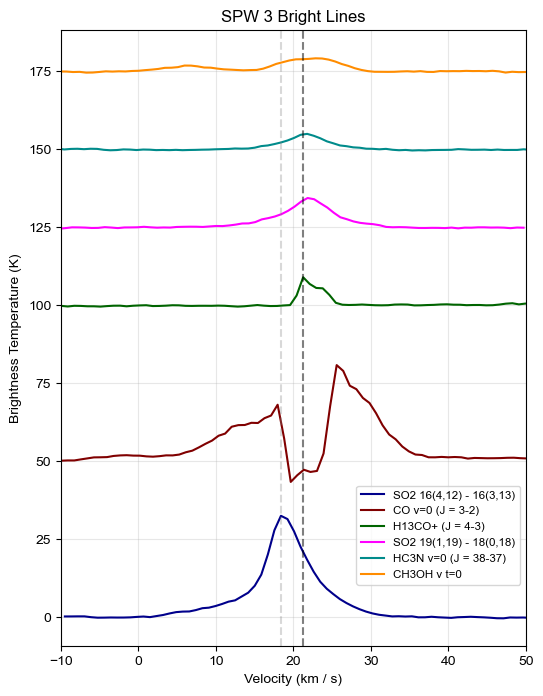

In [22]:
# Visualisation of all bright lines identified (Stacked)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
from astropy.utils import data
data.conf.remote_timeout = 60
from astropy.convolution import convolve, Gaussian1DKernel
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from spectral_cube import SpectralCube
plt.rc('font', family='Arial')  
plt.rc('mathtext', fontset='stix')  # Use a compatible mathtext fontset
hc3n = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_HC3N_J38_37.fits")
co  = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_CO_J3_2.fits")
ch3oh = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_CH3OH_J3_2.fits")
so2_1 = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_SO2_firstline.fits")
so2_2 =  SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_SO2_secondline.fits")
h13co = SpectralCube.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_BrightLines\SPW3_H13COplus_J4_3.fits")

spec_axis_hc3n = hc3n.spectral_axis
spec_axis_co = co.spectral_axis
spec_axis_ch3oh = ch3oh.spectral_axis
spec_axis_so2_1 = so2_1.spectral_axis
spec_axis_so2_2 = so2_2.spectral_axis
spec_axis_h13co = h13co.spectral_axis

avg_spec_hc3n = hc3n.mean(axis=(1, 2))
avg_spec_co = co.mean(axis=(1, 2))
avg_spec_ch3oh = ch3oh.mean(axis=(1, 2))
avg_spec_so2_1 = so2_1.mean(axis=(1, 2))
avg_spec_so2_2 = so2_2.mean(axis=(1, 2))
avg_spec_h13co = h13co.mean(axis=(1, 2))

offset = 25 * u.K
plt.figure(figsize=(6, 8))
plt.plot(spec_axis_so2_1, avg_spec_so2_1, color = 'darkblue', label='SO2 16(4,12) - 16(3,13)')
plt.plot(spec_axis_co, avg_spec_co + 2*offset, color = 'maroon', label='CO v=0 (J = 3-2)')
plt.plot(spec_axis_h13co, avg_spec_h13co + 4*offset, color = 'darkgreen', label='H13CO+ (J = 4-3)')
plt.plot(spec_axis_so2_2, avg_spec_so2_2 + 5*offset, color = 'magenta', label='SO2 19(1,19) - 18(0,18)')
plt.plot(spec_axis_hc3n, avg_spec_hc3n + 6*offset, color = 'darkcyan', label='HC3N v=0 (J = 38-37)')
plt.plot(spec_axis_ch3oh, avg_spec_ch3oh + 7*offset, color = 'darkorange', label='CH3OH v t=0')

plt.xlabel('Velocity ({})'.format(spec_axis_co.unit))
plt.ylabel('Brightness Temperature ({})'.format(avg_spec_co.unit))
plt.title('SPW 3 Bright Lines')
# plt.grid(alpha = 0.2)
plt.legend(fontsize="small", loc='upper right', bbox_to_anchor=(1,0.27))

max_index = np.argmax(avg_spec_h13co)
max_freq = spec_axis_h13co[max_index]
max_index_1 = np.argmax(avg_spec_so2_1)
max_freq_1 = spec_axis_so2_1[max_index_1]

# Add a vertical dotted line
plt.axvline(max_freq.value, linestyle='--', color='black', alpha=0.5, label = '')
plt.axvline(max_freq_1.value, linestyle='--', color='gray', alpha=0.3)
plt.grid(alpha = 0.3)
plt.xlim(-10,50)


plt.savefig(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\bright_lines_stacked.png")

plt.show()
